# 🧭 **Exploratory Data Analysis (EDA): Flights Dataset**

This notebook marks the **Exploratory Data Analysis (EDA)** phase within our **Travel MLOps Project**. Our focus is the **Flights dataset**, which we will dissect to uncover critical insights, identify data quality issues, and lay a robust groundwork for developing our **Flight Price Prediction Model**.

🎯 **Primary Goal of this EDA**:
To gather the necessary understanding and insights to construct a high-performing **Regression Model** capable of accurately predicting flight prices. This model will leverage key features including distance, time, flight class, agency, and travel route.

---

## 📦 **Dataset At a Glance: Flights**

The **Flights dataset** provides structured records of user flight bookings. It encompasses details on travel routes, flight characteristics, pricing (our target variable), and booking agencies.

| Column       | Description                                     |
|--------------|-------------------------------------------------|
| `travelCode` | Unique identifier for each travel itinerary     |
| `userCode`   | Identifier for the user (links to Users table)  |
| `from`       | Origin city/airport of the flight               |
| `to`         | Destination city/airport of the flight          |
| `flightType` | Service class of the flight (e.g., Economy, First Class) |
| `price`      | **Target Variable**: Cost of the flight (USD)   |
| `time`       | Flight duration (in hours)                      |
| `distance`   | Flight distance (e.g., in kilometers or miles)  |
| `agency`     | Airline or travel agency facilitating the booking|
| `date`       | Date of the flight departure                    |

---

## 🎯 **Key Objectives of this Analysis**

This EDA serves several critical functions in our model development lifecycle:

-   **Deep Dive into Data Structure:** We will thoroughly examine the dataset's schema, data types, and the distributions of categorical and numerical features.
-   **Pinpoint Data Quality Concerns:** Our investigation will focus on identifying and quantifying issues such as missing values, outliers, anomalies, and duplicate records.
-   **Evaluate Feature Relationships and Importance:** We aim to understand how each feature correlates with the target variable (`price`) and with other features, highlighting potential predictors.
-   **Inform Preprocessing and Feature Engineering:** The insights gained will directly guide the strategies for data cleaning, transformation, feature selection, and the creation of new, impactful features for the **Flight Price Prediction Model**.

---

## 🔍 **Analytical Approach**

Our exploration of the Flights dataset will involve a comprehensive analysis using descriptive statistics, various data visualizations (histograms, scatter plots, box plots), and correlation studies.

The findings from this process are crucial, as they will directly inform our **feature selection criteria, data transformation techniques, and the overall design of our model training pipeline**, all aimed at achieving accurate flight price predictions.

> Given the manageable number of features in this dataset, we will employ a thorough visualization strategy. This includes generating pair plots for numerical features, frequency plots for categorical features, and comparative plots (like box plots) across numerical and categorical feature combinations. This ensures a comprehensive understanding of inter-feature relationships and patterns.

Let's dive into the data!

### **Import Necessary Libraries and Packages**

In [24]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import os

from sklearn.model_selection import train_test_split


In [25]:
# Move to the parent directory
import sys

sys.path.append("../")

import utils
import importlib

importlib.reload(utils)  # Force reload

from utils.data_utils import (
    check_duplicates,
    generate_eda_report,
    get_date_stats,
    plot_date_frequency_bar,
    get_date_stats,
)

In [26]:
print(dir(utils.data_utils))


['ProfileReport', 'Settings', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'check_duplicates', 'generate_eda_report', 'get_date_stats', 'mdates', 'np', 'pd', 'plot_date_frequency_bar', 'plt', 'train_test_split']


### **Load The Dataset**

In [27]:
flights_path = "../data/flights.csv"
# Load the dataset
flights = pd.read_csv(flights_path)

In [28]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### **Checking Duplicates**

In [29]:
check_duplicates(flights)

Percentage of rows involved in duplication: 0.00%


### **Relevance of `travelCode` and `userCode` in EDA**

The `travelCode` and `userCode` columns primarily serve as identifiers.

*   **`travelCode`**: This links related flight segments, such as an outbound and its corresponding return trip. For example:

    | travelCode | userCode | from             | to                 | date       |
    |------------|----------|------------------|--------------------|------------|
    | 0          | 0        | Recife (PE)      | Florianopolis (SC) | 09/26/2019 |
    | 0          | 0        | Florianopolis (SC)| Recife (PE)        | 09/30/2019 |

*   **`userCode`**: This links flights to specific users, enabling connections to the `users.csv` data.

*   It's possible for different `travelCode` or `userCode` entries to correspond to flights with identical details (route, price, time, distance, agency). This can happen if multiple users book the same flight. Including these identifiers directly in analyses focused on flight attributes without aggregation could potentially cause **Bias** in a model by over-representing frequently booked flight configurations.

In [30]:
# Drop keys
flights.drop(columns=["travelCode", "userCode"], inplace=True)

In [31]:
flights.head()

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### **Checking And Handling duplicate values after removing unique identifiers(`travelCode` and `userCode`)**


In [32]:
check_duplicates(flights)


Percentage of rows involved in duplication: 45.02%


- This suggest many of the duplicates were hidded due to unique identifiers

In [33]:
# remove duplicates
flights.drop_duplicates(inplace=True)
check_duplicates(flights)


Percentage of rows involved in duplication: 0.00%


### ✈️ **Addressing Duplicate Flight Records**

Our analysis revealed a significant number of duplicate entries within the dataset:

-   **Substantial Duplicate Presence:**
    Approximately **45.02%** of the flight records were identified as duplicates. This high percentage is attributed to multiple unique `travelCode` and `userCode` entries corresponding to identical flight details (route, timing, price, etc.), likely representing different bookings for the same underlying flight service.

-   **Critical Preprocessing Step: Duplicate Removal:**
    🚮 It is crucial to **remove these duplicate records** before proceeding with further analysis or model training.
    -   **Impact on Analysis:** Retaining duplicates would skew descriptive statistics and visualizations, leading to inaccurate interpretations of flight patterns and pricing.
    -   **Impact on Modeling:** For machine learning, these duplicates can introduce significant bias, leading to an overestimation of model performance on seen data and poor generalization to new, unseen flight queries. Removing them ensures model integrity and more reliable predictions.

---

### 📑 **Automated EDA with `ydata-profiling`**

In [34]:
flights.head()

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [35]:
# Try minimal = True if you receive any errors

# generate_eda_report(
#     flights,
#     "Flights EDA Report",
#     "../reports/eda/flights_eda_report.html",
#     minimal=True,
#     explorative=False,
# )

### **Statistical Analysis**

#### 5 Number Summary

In [36]:
flights.sample(5)

,from,to,flightType,price,time,distance,agency,date
194949,Brasilia (DF),Florianopolis (SC),firstClass,1569.65,1.66,637.56,FlyingDrops,02/16/2020
113719,Sao Paulo (SP),Campo Grande (MS),economic,367.22,0.44,168.22,Rainbow,06/13/2021
15078,Brasilia (DF),Salvador (BH),premium,1346.60,1.76,676.56,CloudFy,11/05/2020
191243,Sao Paulo (SP),Florianopolis (SC),firstClass,1718.28,1.46,562.14,Rainbow,09/28/2019
183246,Florianopolis (SC),Recife (PE),firstClass,1300.60,1.76,676.53,CloudFy,08/06/2020


In [37]:
flights.describe(include="number")

,price,time,distance
count,149484.000000,149484.000000,149484.000000
mean,949.422468,1.363235,524.676537
std,358.448214,0.547956,210.969025
min,301.510000,0.440000,168.220000
25%,669.830000,0.850000,327.550000
50%,898.040000,1.440000,555.740000
75%,1214.820000,1.760000,676.530000
max,1754.170000,2.440000,937.770000


In [38]:
flights.describe(include=["object", "category"])

,from,to,flightType,agency,date
count,149484,149484,149484,149484,149484
unique,9,9,3,3,999
top,Florianopolis (SC),Florianopolis (SC),firstClass,Rainbow,12/19/2019
freq,18800,31438,64169,64167,358


##### Main Insights

-   **Price:** The average flight price is approximately 949 units, with a significant range from about 301 to 1754 units. The median price (898 units) is slightly lower than the mean, suggesting a slight right skew in the price distribution, with some flights being considerably more expensive.
-   **Time:** Flight durations average around 1.36 hours, typically varying by about half an hour (standard deviation of 0.55 hours). The flight times range from approximately 26 minutes (0.44 hours) to about 2.44 hours.
-   **Distance:** The average flight distance is roughly 525 units, with substantial variability (standard deviation of 211 units). Distances cover a wide span from approximately 168 to 938 units. The median distance (556 units) being slightly higher than the mean suggests a slight left skew, indicating a number of shorter flights.

#### **Date Analysis**


In [41]:
flights["date"] = pd.to_datetime(flights["date"], errors="coerce")
flights["month"] = flights["date"].dt.month
flights["year"] = flights["date"].dt.year
flights["day"] = flights["date"].dt.day
flights.head()

,from,to,flightType,price,time,distance,agency,date,month,year,day
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,9,2019,26
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,9,2019,30
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,10,2019,3
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,10,2019,4
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,10,2019,10


In [ ]:
flights["month"].groupby(flights["year"]).value_counts()

year  month
2019  12       5026
      10       4995
      11       4984
      9        1148
2020  1        5074
      5        4822
      3        4799
      4        4724
      7        4700
      8        4677
      2        4662
      10       4645
      6        4452
      11       4261
      12       4229
      9        4050
2021  1        4285
      4        3994
      5        3907
      7        3866
      3        3856
      2        3793
      8        3504
      9        3403
      6        3402
      10       3385
      12       3291
      11       3106
2022  1        3142
      3        2871
      4        2798
      2        2719
      5        2644
      6        2527
      7        2446
      8        2211
      9        2191
      10       1993
      12       1756
      11       1614
2023  1        1402
      2        1161
      3        1125
      4         814
      5         543
      6         362
      7         125
Name: count, dtype: int64

In [20]:
get_date_stats(flights["date"])

--- Comprehensive Date Statistics for: Date Column ---
Minimum Date: 2019-09-26
Maximum Date: 2023-07-24
Total time span: 1397 days 00:00:00
Number of unique days with data: 999

--- Yearly Frequencies ---
date
2019    16153
2020    55095
2021    43792
2022    28912
2023     5532
Name: count, dtype: int64
Number of unique years with data: 5

--- Overall Monthly Frequencies (Aggregated Across All Years) ---
date
Jan    13903
Feb    12335
Mar    12651
Apr    12330
May    11916
Jun    10743
Jul    11137
Aug    10392
Sep    10792
Oct    15018
Nov    13965
Dec    14302
Name: count, dtype: int64
Number of unique months (e.g., Jan, Feb) with data across all years: 12

--- Monthly Frequencies for Each Year ---
month_name  January  February  March  April   May  June  July  August  \
year                                                                    
2019              0         0      0      0     0     0     0       0   
2020           5074      4662   4799   4724  4822  4452  4700    4677

In [42]:
print(f"{flights['year'].value_counts().sort_index()}")
print(f"{flights['month'].value_counts().sort_index()}")

year
2019    16153
2020    55095
2021    43792
2022    28912
2023     5532
Name: count, dtype: int64
month
1     13903
2     12335
3     12651
4     12330
5     11916
6     10743
7     11137
8     10392
9     10792
10    15018
11    13965
12    14302
Name: count, dtype: int64


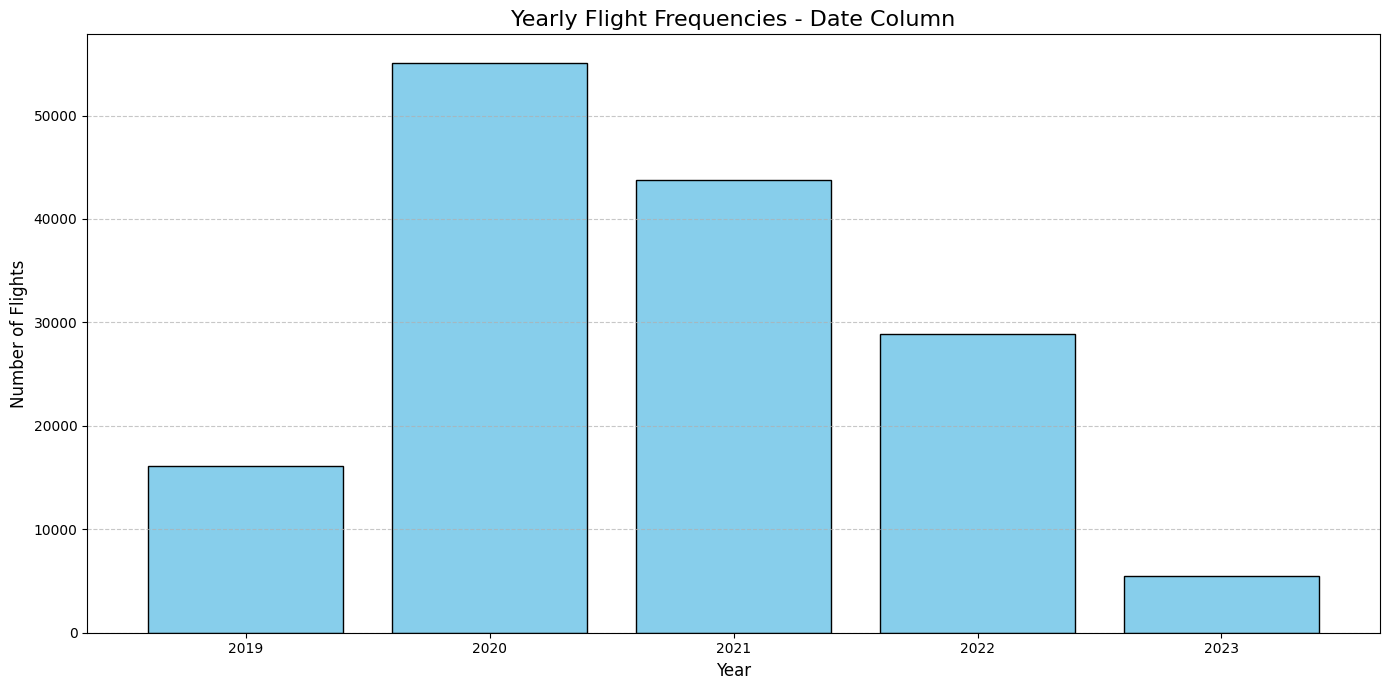

--- End of Y Plot ---



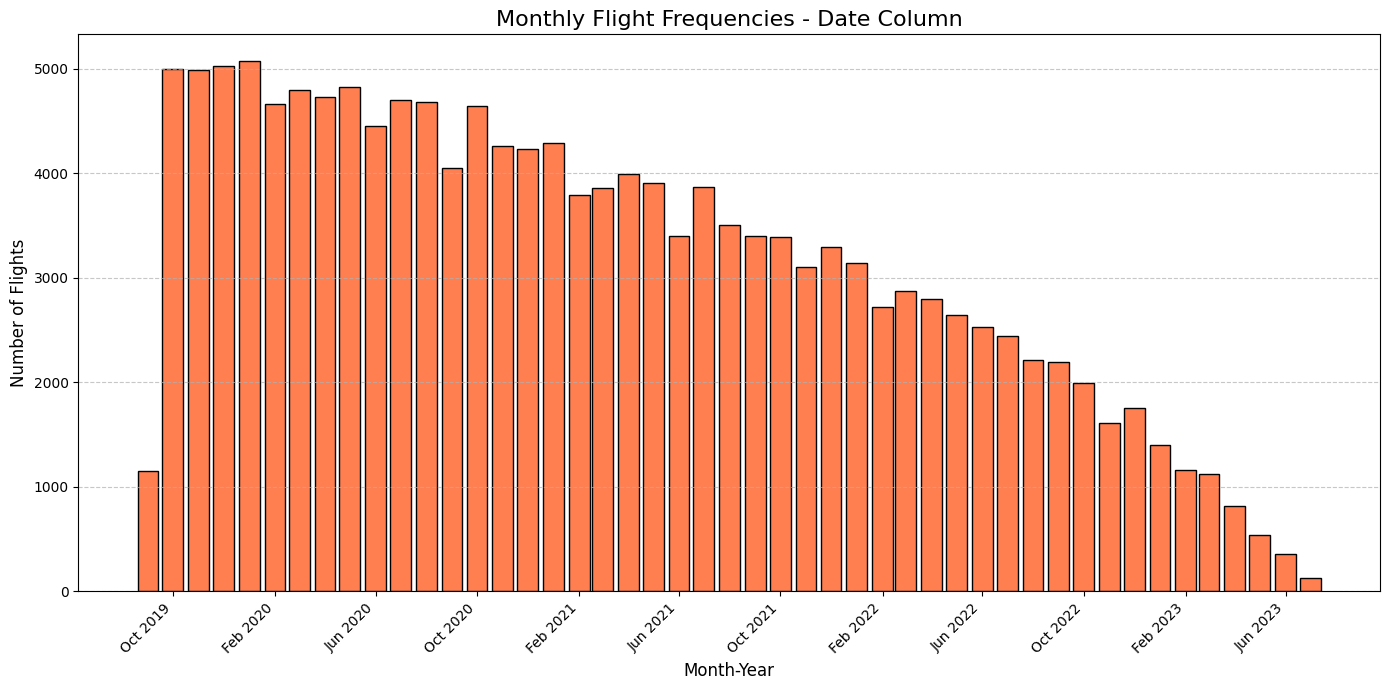

--- End of M Plot ---



In [ ]:
plot_date_frequency_bar(flights["date"], freq="Y")
plot_date_frequency_bar(flights["date"], freq="M")


### **Column Information**

In [78]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   from        149484 non-null  object 
 1   to          149484 non-null  object 
 2   flightType  149484 non-null  object 
 3   price       149484 non-null  float64
 4   time        149484 non-null  float64
 5   distance    149484 non-null  float64
 6   agency      149484 non-null  object 
 7   date        149484 non-null  object 
dtypes: float64(3), object(5)
memory usage: 10.3+ MB


In [ ]:
flights.nunique()

from            9
to              9
flightType      3
price         490
time           33
distance       35
agency          3
date          999
dtype: int64